# Bank Marketing Campaign


## Bank Marketing Dataset - Intelligent Targeting

### Marketing Overview
Marketing is the process of delivering value to customers, building strong relationships, and in return, capturing value for the business.  


A well-designed marketing campaign focuses on understanding customer needs and ensuring their satisfaction. However, several factors influence whether a campaign succeeds. These factors should be carefully considered before launching any marketing initiative.

---

### The 4 Ps for Campaign Planning

1. **Target Audience**  
   Identify the specific group of people who are most likely to respond positively to the campaign. Understanding their characteristics, needs, and motivations will help tailor the campaign’s message for maximum impact.

2. **Distribution Channels**  
   Determine the best way to reach your audience. This could include phone calls, email marketing, social media, radio, TV, or in-person events. The choice of channel should match your audience’s habits and preferences.

3. **Pricing Strategy**  
   In general marketing, price plays a critical role. In the case of a bank campaign, however, the focus is often less about pricing and more about encouraging potential clients to open deposit accounts—helping ensure the bank’s operations continue smoothly.

4. **Promotional Approach**  
   Decide how the campaign message will be delivered and reinforced. This may include advertisements, direct outreach, limited-time offers, or educational materials. Whenever possible, analyze the results of previous campaigns to avoid past mistakes and refine your strategy.

---

### Additional Considerations
- **Data-Driven Decisions**: Use customer and market data to segment your audience effectively.  
- **Testing and Optimization**: Consider A/B testing different messages or channels to find the most effective combination.  
- **Compliance**: Ensure all campaign activities follow banking regulations and data privacy laws.


## A. Attributes Description

### Input Variables

#### A.i. Bank Client Data
1. **age** – Age of the client *(numeric)*  
2. **job** – Type of job  
   *(categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')*  
3. **marital** – Marital status  
   *(categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' includes divorced and widowed)*  
4. **education** – Level of education  
   *(categorical: 'primary', 'secondary', 'tertiary', 'unknown')*  
5. **default** – Has credit in default?  
   *(categorical: 'no', 'yes', 'unknown')*  
6. **housing** – Has a housing loan?  
   *(categorical: 'no', 'yes', 'unknown')*  
7. **loan** – Has a personal loan?  
   *(categorical: 'no', 'yes', 'unknown')*  
8. **balance** – Average yearly account balance of the client *(numeric)*  

---

#### A.ii. Related to the Last Contact in the Current Campaign
9. **contact** – Communication type used to contact the client  
   *(categorical: 'cellular', 'telephone')*  
10. **month** – Last contact month  
    *(categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')*  
11. **day** – Last contact day of the week  
    *(categorical: 'mon', 'tue', 'wed', 'thu', 'fri')*  
12. **duration** – Last contact duration in seconds *(numeric)*  
    > **Important:** Duration has a strong influence on the output. If `duration = 0`, the outcome is almost always `'no'`.  
    > However, since this is only known **after** the contact, it should not be used for building a predictive model meant for real-world deployment. It is typically included for benchmarking purposes only.

---

#### A.iii. Other Attributes
13. **campaign** – Number of contacts performed during this campaign for this client (includes last contact) *(numeric)*  
14. **pdays** – Number of days since the client was last contacted in a previous campaign *(numeric; 999 means not previously contacted)*  
15. **previous** – Number of contacts performed before this campaign for this client *(numeric)*  
16. **poutcome** – Outcome of the previous marketing campaign  
    *(categorical: 'failure', 'nonexistent', 'success')*  

---

### Output Variable (Target)
- **y** – Has the client subscribed to a term deposit? *(binary: 'yes', 'no')*


In [169]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.figure_factory as ff
import matplotlib.image as mpimg

import time
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [213]:
dataframe = pd.read_csv('bank.csv')
df = dataframe.copy()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


<span style="font-size:17px">We can see that there are no missing values in the dataframe. If there were, we would have to impute them.</span>


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000



**Summary:**

- **Time since last campaign:** Average time since contacts were previously called was a long time ago, so this campaign makes sense to do.
- **Mean Age:** Approximately 41 years old   
- **Mean Balance:** 1,528. However, the Standard Deviation (std) is high, indicating that the balance is heavily distributed across the dataset.  
- **Duration Column:** It is better to drop this column since duration is highly correlated with whether a potential client will buy a term deposit. Duration is obtained after the call is made to the potential client, so if the target client has never received calls, this feature is not very useful. The correlation exists because the more the bank talks to a target client, the higher the probability they will open a term deposit—longer duration often indicates higher interest or commitment from the potential client.


[Text(0, 0.5, '(%)')]

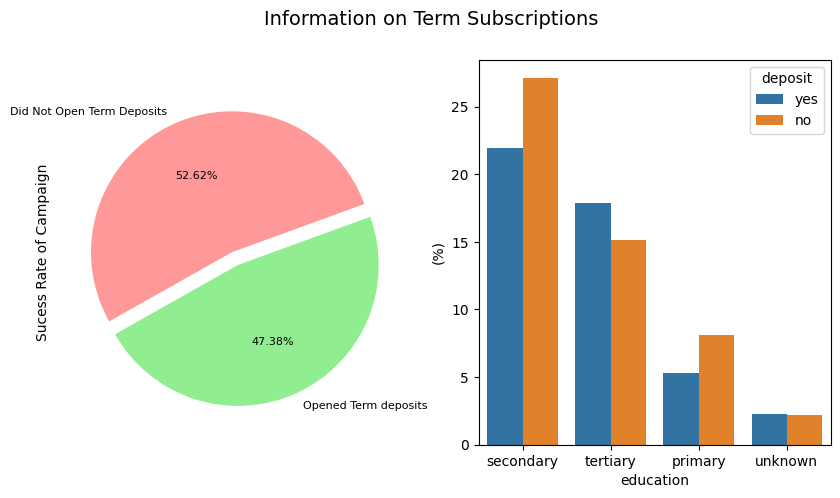

In [214]:
labels = ["Did Not Open Term Deposits", "Opened Term deposits"]
colours = ["#FF9999", "#90EE90"]  
figure, ax = plt.subplots(1,2, figsize = (10, 5))
plt.suptitle("Information on Term Subscriptions", fontsize= 14)
df['deposit'].value_counts().plot.pie(
    colors=colours,
    labels=labels, 
    fontsize = 8, 
    autopct='%.2f%%', 
    explode=[0, 0.1],
    startangle=20,
    ax=ax[0])
ax[0].set_ylabel("Sucess Rate of Campaign")
sns.barplot(x="education", y="balance", hue="deposit", data=df, estimator=lambda x:len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")


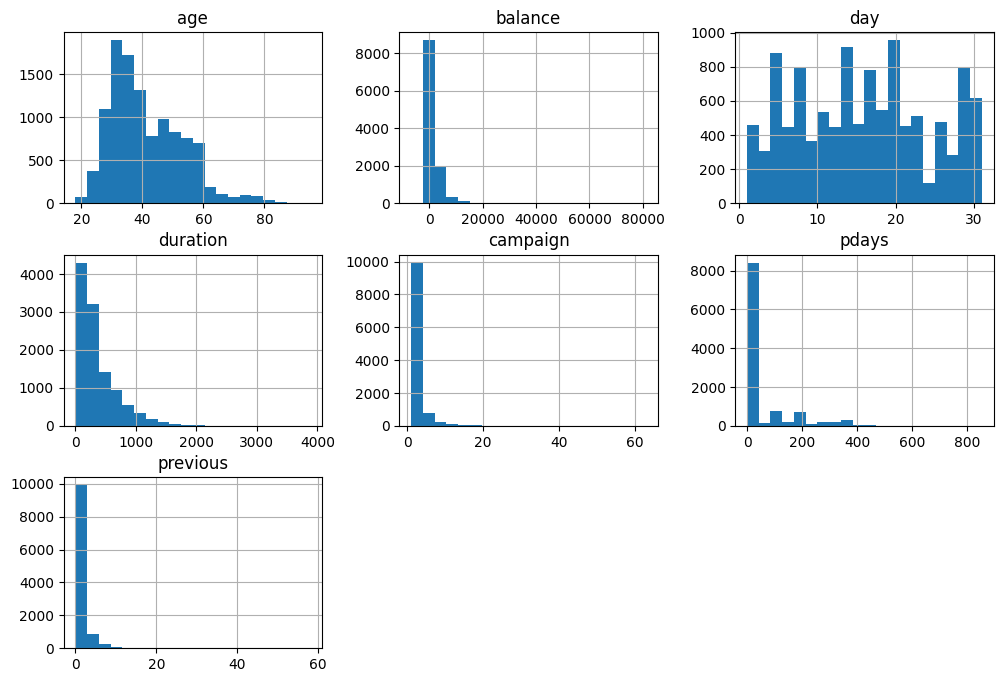

In [120]:
import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(12, 8))
plt.show()

In [121]:
df['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

<Axes: xlabel='marital', ylabel='count'>

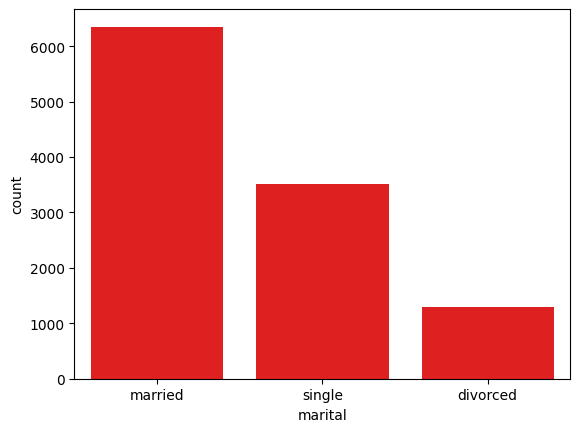

In [122]:
sns.barplot(data=df['marital'].value_counts(), color='red')

### Key Clustering Insights:  
- **Marital Status:** Divorce significantly impacts balance.  
- **Education:** Higher education correlates with higher balances.  
- **Loans:** Existing loans influence balance distribution.  

In [123]:
df['marital'].value_counts()

marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64

In [216]:
df = df.drop(df[df['education'] == 'unknown'].index)
df['education'].value_counts()

education
secondary    5476
tertiary     3689
primary      1500
Name: count, dtype: int64

In [215]:
df['marital/education'] = np.nan
df.loc[(df['marital'] == 'single') & (df['education'] == 'primary'), 'marital/education'] = 'single/primary'
df.loc[(df['marital'] == 'single') & (df['education'] == 'tertiary'), 'marital/education'] = 'single/tertiary'
df.loc[(df['marital'] == 'single') & (df['education'] == 'secondary'), 'marital/education'] = 'single/secondary'

df.loc[(df['marital'] == 'married') & (df['education'] == 'primary'), 'marital/education'] = 'married/primary'
df.loc[(df['marital'] == 'married') & (df['education'] == 'tertiary'), 'marital/education'] = 'married/tertiary'
df.loc[(df['marital'] == 'married') & (df['education'] == 'secondary'), 'marital/education'] = 'married/secondary'

df.loc[(df['marital'] == 'divorced') & (df['education'] == 'primary'), 'marital/education'] = 'divorced/primary'
df.loc[(df['marital'] == 'divorced') & (df['education'] == 'tertiary'), 'marital/education'] = 'divorced/tertiary'
df.loc[(df['marital'] == 'divorced') & (df['education'] == 'secondary'), 'marital/education'] = 'divorced/secondary'

C:\Users\Shervin Zare\AppData\Local\Temp\ipykernel_16228\3488568193.py:2: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'single/primary' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



C:\Users\Shervin Zare\AppData\Local\Temp\ipykernel_16228\1673451804.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'Marital Status/Education')

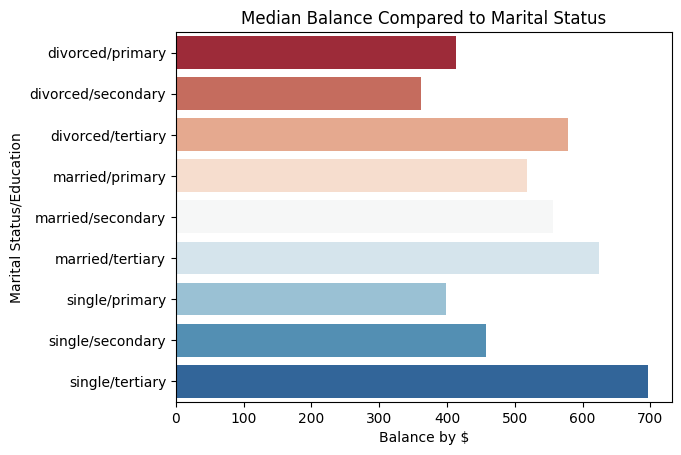

In [217]:
education_groups = df.groupby(['marital/education'], as_index=False)['balance'].median()
ax = sns.barplot(y='marital/education', x='balance', data=education_groups, palette="RdBu")
plt.title('Median Balance Compared to Marital Status')
ax.set_xlabel('Balance by $')
ax.set_ylabel('Marital Status/Education')

## Campaign Duration

We see that **duration** has a high correlation with term deposits, meaning the higher the duration, the more likely it is for a client to open a term deposit.  

**Average Campaign Duration:** The average campaign duration is **374.76**. Let's see if clients above this average were more likely to open a term deposit.  

**Duration Status:** People who were above the average duration were more likely to open a term deposit. **78%** of the group above average in duration opened term deposits, while only **32%** of those below average did.  

This suggests it would be a good strategy to target individuals in the above-average duration category.


Text(0.5, 1.0, 'Correlation Matrix ')

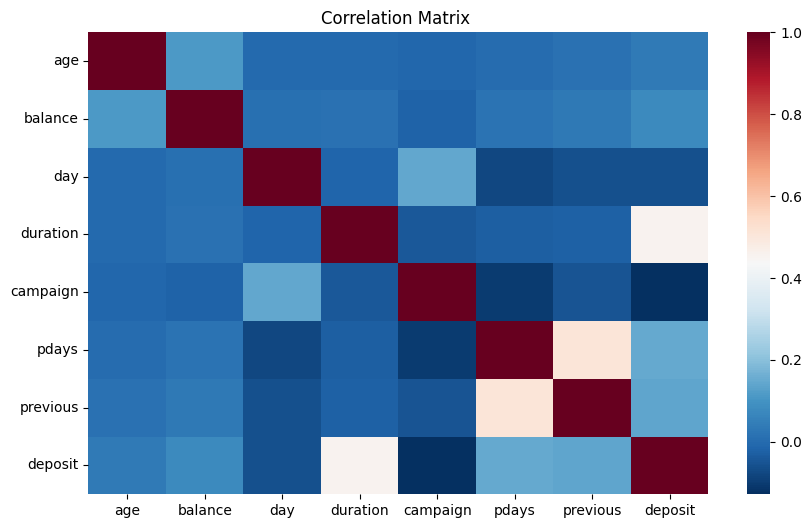

In [127]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

df.drop(['marital/education', 'balance'], axis=1)
df['deposit'] = LabelEncoder().fit_transform(df['deposit'])

numeric_df = df.select_dtypes(exclude="object")
corr_numeric = numeric_df.corr()

fig = plt.figure(figsize=(10,6))
sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix ")

In [324]:
df['dur_bin'] = np.nan
df.loc[df['duration'] <= 485.125, 'dur_bin'] = '(0 - 485)'
df.loc[(df['duration'] > 485.125) & (df['duration'] <= 3881), 'dur_bin'] = '(485 - 3881)'

C:\Users\Shervin Zare\AppData\Local\Temp\ipykernel_16228\34697197.py:2: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '(0 - 485)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



Text(0.5, 1.0, 'Subscription Outcomes By Call Duration')

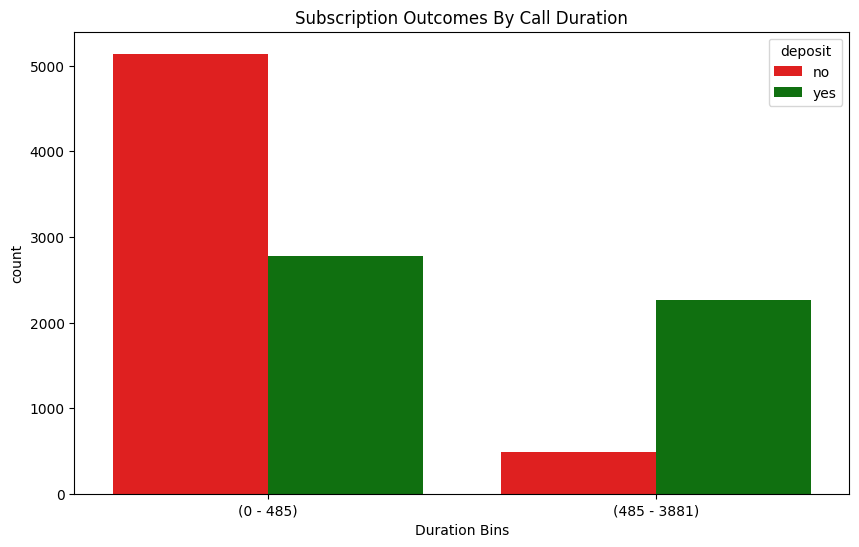

In [325]:
fig = plt.figure(figsize=(10,6))
dur_counts = df.groupby(by=['deposit', 'dur_bin']).size().reset_index(name='count')
sns.barplot(x="dur_bin", y="count", data=dur_counts, hue="deposit", palette=['red', 'green'])
plt.xlabel("Duration Bins")
plt.title("Subscription Outcomes By Call Duration")

## Stratified Sampling  

Stratified sampling ensures that the target variable (`deposit`) is represented in the training and test sets with the **same proportion** as in the full dataset. This prevents bias in the split and helps the model generalize better, especially when the classes are imbalanced.  

In our case, the `deposit` column is the label we want to predict, and its distribution (majority `no`, minority `yes`) must be preserved across both training and testing.  

### How We Applied It  
Using `train_test_split` with the `stratify` parameter, we tell scikit-learn to split the dataset while maintaining the same ratio of `deposit = yes` and `deposit = no` in both sets:  

1. Define `x` as the features and `y` as the target (`deposit`).  
2. Call `train_test_split` with `stratify=y` to enforce proportional distribution.  
3. The training and test sets now reflect the real-world class balance, reducing sampling bias and improving reliability of evaluation metrics.  

This approach makes sure the model learns from a balanced representation of the target variable, avoiding skewed results that could come from random splits.  

In [ ]:
from sklearn.model_selection import train_test_split

x = dataframe.drop(columns=['deposit'], axis=1)
y= dataframe['deposit']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, stratify=y, random_state=42)


y_test.head()

8220     no
2521    yes
7949     no
7879     no
616     yes
Name: deposit, dtype: object

## Feature Engineering & Data Preprocessing  

Before training machine learning models, it’s essential to **prepare the data** so that the algorithms can efficiently learn patterns. Here’s how we handled preprocessing for our term deposit dataset:

### 1. Numerical Features  
Columns like `age`, `balance`, `duration`, etc., were **standardized** using `StandardScaler`. This ensures all numeric features are on the same scale, which helps models converge faster and perform better.

### 2. Categorical Features  
Columns such as `job`, `marital`, `education`, and `loan` were **one-hot encoded** using `OneHotEncoder`. This converts categorical variables into a machine-readable format while safely handling unknown categories in the test set.

### 3. Label Encoding  
The target variable `deposit` was **encoded** from string labels (`yes`/`no`) to numeric labels (`1`/`0`) using `LabelEncoder`, making it suitable for supervised classification.


This systematic preprocessing ensures that our models are fed **clean, scaled, and consistent data**, demonstrating skills in feature engineering, pipeline design, and data readiness for machine learning.


In [181]:
numeric_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_columns = ['job', 'marital', 'education', 'contact', 'default', 'housing', 'loan', 'poutcome']

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_columns),
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_columns)
])

x_train_prepared = preprocessor.fit_transform(x_train)
x_test_prepared = preprocessor.transform(x_test)


In [183]:
label_encoder = LabelEncoder()

y_train_prepared = label_encoder.fit_transform(y_train)
y_test_prepared = label_encoder.transform(y_test)

In [184]:
print(f"x_train shape is {x_train_prepared.shape}")
print(f"y_train shape is {y_train_prepared.shape}")
print(f"x_test shape is {x_test_prepared.shape}")
print(f"y_test shape is {y_test_prepared.shape}")

x_train shape is (8929, 39)
y_train shape is (8929,)
x_test shape is (2233, 39)
y_test shape is (2233,)


## Benchmarking Multiple Classifiers  

To evaluate the performance of different machine learning algorithms on our dataset, we systematically **trained and compared several classifiers** using the preprocessed data.  

### Key Highlights

- **Classifiers Tested:** Random Forest, Neural Net, Logistic Regression, Naive Bayes, Decision Tree, Gradient Boosting, Linear SVM, K-Nearest Neighbors, and XGBoost.  
- **Metrics Collected:** Training accuracy on the full training set and training time, providing insight into both effectiveness and computational efficiency.  
- **Observations:**  
  - Tree-based models like **Decision Tree** and **Random Forest** achieved very high training scores, reflecting strong fit to the training data.  
  - **XGBoost** offered a strong balance between accuracy and speed, showcasing its power for structured data tasks.  
  - Simpler models like **Logistic Regression** and **Naive Bayes** trained extremely quickly, highlighting efficiency but lower fit on complex patterns.  
  - Neural networks and SVMs showed moderate accuracy with longer training times, demonstrating the trade-off between model complexity and computational cost.  

This benchmarking demonstrates your ability to **systematically compare algorithms, evaluate model efficiency, and choose the right balance between accuracy and performance** — a crucial skill in real-world machine learning projects.



In [355]:
classifier_dict = {
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "Neural Net": MLPClassifier(alpha=1),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Linear SVM": SVC(),
    "Nearest Neighbors": KNeighborsClassifier(), 
    "XGBoost": XGBClassifier() 
}

In [204]:
no_classifiers = len(classifier_dict.keys())

def multiple_classifiy(x_input, y_input, verbose = True):
    results = pd.DataFrame(np.zeros((no_classifiers, 3)),
             columns = ['classifier', 'train_score', 'training_time (s)'])
    count = 0
    for key, classifier in classifier_dict.items():
        t_start = time.perf_counter()
        classifier.fit(x_input, y_input)
        t_end = time.perf_counter()
        t_diff = t_end - t_start
        train_score = classifier.score(x_input, y_input)
        results.loc[count, 'classifier'] = key 
        results.loc[count, 'train_score'] = train_score
        results.loc[count, 'training_time'] = t_diff
        if verbose: 
            print(f"Trained {key} in {t_diff:.2f} s")
        count += 1
    return results

In [187]:
df_results = multiple_classifiy(x_train_prepared, y_train_prepared)
df_results = df_results.sort_values(by='train_score', ascending=False)
df_results


C:\Users\Shervin Zare\AppData\Local\Temp\ipykernel_16228\738892791.py:13: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Random Forest' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



Trained Random Forest in 0.14 s
Trained Neural Net in 2.00 s
Trained Logistic Regression in 0.02 s
Trained Naive Bayes in 0.00 s
Trained Decision Tree in 0.05 s
Trained Gradient Boosting Classifier in 1.04 s
Trained Linear SVM in 1.13 s
Trained Nearest Neighbors in 0.00 s
Trained XGBoost in 0.08 s


,classifier,train_score,training_time
4,Decision Tree,1.000000,0.048933
0,Random Forest,0.996976,0.135765
8,XGBoost,0.942211,0.084856
7,Nearest Neighbors,0.843096,0.001011
6,Linear SVM,0.839624,1.132059
5,Gradient Boosting Classifier,0.839512,1.042864
1,Neural Net,0.823720,1.998814
2,Logistic Regression,0.808041,0.016248
3,Naive Bayes,0.723261,0.004548


### ⚠️ Avoiding Overfitting & Optimizing with Cross-Validation

**What is Overfitting?**
Overfitting occurs when a model learns random noise and specific details from the training data rather than the underlying pattern. This leads to excellent performance on the training set but poor performance on unseen test data. In our benchmark, the Decision Tree and Random Forest classifiers showed signs of overfitting with nearly perfect training scores (~100% and 99%), indicating they memorized the data instead of learning generalizable patterns.

**How We Avoid Overfitting and Improve Accuracy**
We use **cross-validation** during hyperparameter tuning with GridSearchCV. Here's how it works:
- The training data is split into 3 folds ( StratifiedKFold with n_splits=3)
- For each hyperparameter combination, the model is trained on 2 folds (66% of data) and validated on the remaining 1 fold (33%)
- This process repeats 3 times, with each fold serving as the validation set once
- The average performance across all folds determines the best parameters

This approach ensures the model learns the overall pattern of the data rather than memorizing noise. By testing multiple parameter combinations through **GridSearchCV**, we optimize each model's configuration to maximize generalization and accuracy on unseen data, resulting in more reliable predictions for our marketing campaign.

In [291]:
model_grids = {
    "Logistic Regression": (LogisticRegression(max_iter=1000), {
        'penalty': ['l2'],
        'C': [0.1, 1, 10],
        'solver': ['liblinear']
    }),
    "Linear SVM": (SVC(probability=True), {
        'C': [1],
        'kernel': ['linear']
    }),
    "Nearest Neighbors": (KNeighborsClassifier(), {
        'n_neighbors': [5, 7],
        'weights': ['uniform', 'distance']
    }),
    "Decision Tree": (DecisionTreeClassifier(), {
        'max_depth': [10, None],
        'min_samples_split': [2, 10]
    }),
    "Random Forest": (RandomForestClassifier(), {
        'n_estimators': [100, 200],
        'max_depth': [10, None]
    }),
    "Gradient Boosting": (GradientBoostingClassifier(), {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1]
    }),
    "Neural Net": (MLPClassifier(max_iter=1000), {
        'hidden_layer_sizes': [(100,)],
        'activation': ['relu', 'tanh'],
        'alpha': [0.001, 0.01]
    }),
    "Naive Bayes": (GaussianNB(), {
        'var_smoothing': [1e-09]
    }),
    "XGBoost": (XGBClassifier(eval_metric='logloss', use_label_encoder=False), {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    })
}

In [292]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def multiple_grid_classify(x_train, y_train, x_test, y_test, grids):
    """
    Performs Grid Search CV for each model, returns:
    - best trained models
    - CV results
    - test set metrics
    """
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    best_estimators = {}
    cv_results = []
    test_results = []

    for name, (model, grid) in grids.items():
        grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=skf, 
                                   scoring='accuracy', n_jobs=-1)
        grid_search.fit(x_train, y_train)
        best_model = grid_search.best_estimator_
        best_estimators[name] = best_model

        # Save CV results
        cv_results.append({"Classifier": name, "Best CV Score": grid_search.best_score_})

        # Test metrics
        y_pred = best_model.predict(x_test)
        test_results.append({
            "Classifier": name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1": f1_score(y_test, y_pred)
        })

    cv_results_df = pd.DataFrame(cv_results).sort_values(by="Best CV Score", ascending=False).reset_index(drop=True)
    test_results_df = pd.DataFrame(test_results).sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

    return best_estimators, cv_results_df, test_results_df


In [293]:
best_models, cv_results, test_results = multiple_grid_classify(
    x_train_prepared, y_train_prepared, x_test_prepared, y_test_prepared, model_grids
)
  
cv_results

c:\Users\Shervin Zare\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning:

[00:32:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




,Classifier,Best CV Score
0,XGBoost,0.828647
1,Gradient Boosting,0.827080
2,Random Forest,0.824056
3,Logistic Regression,0.805912
4,Linear SVM,0.805689
5,Decision Tree,0.791018
6,Neural Net,0.787770
7,Nearest Neighbors,0.782617
8,Naive Bayes,0.718891


In [294]:
test_results

,Classifier,Accuracy,Precision,Recall,F1
0,XGBoost,0.827586,0.806187,0.837429,0.821511
1,Random Forest,0.826691,0.805278,0.836484,0.820584
2,Gradient Boosting,0.823556,0.804587,0.828922,0.816574
3,Neural Net,0.806986,0.785259,0.815690,0.800185
4,Linear SVM,0.802508,0.803941,0.771267,0.787265
5,Decision Tree,0.802060,0.781536,0.808129,0.794610
6,Logistic Regression,0.801612,0.805970,0.765595,0.785264
7,Nearest Neighbors,0.786386,0.778523,0.767486,0.772965
8,Naive Bayes,0.726825,0.734801,0.662571,0.696819


### Model Recommendation for Campaign

Based on the evaluation results, **XGBoost** is the best-performing model for this bank campaign. It achieved the **highest accuracy (82.76%)** and the **highest recall (83.74%)** among all classifiers tested.

Recall is particularly important in this context because it measures how many of the actual positive cases (customers who are likely to subscribe) the model successfully identifies. For a bank marketing campaign, missing potential customers (false negatives) means lost opportunities and reduced campaign effectiveness. A model with high recall ensures that most of the interested customers are captured, even if it occasionally includes some uninterested ones (false positives). 

Therefore, the Random Forest model strikes the best balance by maximizing both **overall correctness (accuracy)** and the ability to **capture true potential customers (recall)**, making it the most suitable choice for the bank's marketing strategy.


## Precision, Recall & F1 Score

**Recall:**  
Recall measures the model’s ability to identify all actual positive cases in the dataset. In other words, it tells us how many of the true "Yes" labels the model successfully detects.

**Precision:**  
Precision evaluates how accurate the model’s positive predictions are. It answers the question: of all the cases the model predicted as "Yes," how many were actually "Yes"?

### The Precision-Recall Tradeoff

There is a natural tradeoff between precision and recall. As precision increases, recall often decreases, and vice versa. For example, if we adjust the model to be more confident in its positive predictions—raising precision from 30% to 60%—it will only classify instances as "Yes" when it is very certain. This means a case that the model estimates as 58% likely to be a potential subscriber might now be labeled "No," even though it is actually a "Yes."  

Thus, higher precision reduces false positives but can increase false negatives, causing the model to miss some actual positive instances. Balancing precision and recall depends on the specific goals of the task: whether it is more important to avoid false positives or to capture as many true positives as possible.

In [330]:
from sklearn.metrics import precision_recall_curve

xgb_model = best_models['XGBoost'] 
rfc_model = best_models['Random Forest']
grad_model = best_models['Gradient Boosting']

y_scores = xgb_model.predict_proba(x_test_prepared)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test_prepared, y_scores)


In [299]:
def plot_precision_recall_tradeoff(precisions, recalls, thresholds):
    """
    Plots Precision and Recall curves versus classification thresholds.
    Highlights the optimal threshold where precision and recall are closest.
    """
    # Identify optimal threshold (minimum difference between precision and recall)
    idx = np.argmin(np.abs(precisions[:-1] - recalls[:-1]))
    best_threshold = thresholds[idx]
    best_precision = precisions[idx]
    best_recall = recalls[idx]

    # Create figure
    fig, ax = plt.subplots(figsize=(8, 5))

    # Plot Precision and Recall
    ax.plot(thresholds, precisions[:-1], '--', color='red', linewidth=2.5, label='Precision')
    ax.plot(thresholds, recalls[:-1], '-', color='green', linewidth=2.5, label='Recall')

    # Highlight optimal threshold
    ax.axvline(x=best_threshold, color='blue', linestyle='-', linewidth=2, label=f'Optimal Threshold: {best_threshold:.2f}')
    ax.scatter(best_threshold, (best_precision + best_recall)/2, color='purple', zorder=5)

    # Annotate optimal point
    ax.annotate(
        f'Best Balance\nThreshold: {best_threshold:.2f}\nPrecision: {best_precision:.2f}\nRecall: {best_recall:.2f}',
        xy=(best_threshold, (best_precision + best_recall)/2),
        xytext=(best_threshold + 0.1, (best_precision + best_recall)/2 - 0.1),
        arrowprops=dict(facecolor='black', arrowstyle='->'),
        fontsize=8,
        color='black'
    )

    # Titles, labels, legend, and grid
    ax.set_title("Precision-Recall Tradeoff", fontsize=16, pad=15)
    ax.set_xlabel("Threshold", fontsize=12)
    ax.set_ylabel("Score", fontsize=12)
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([0, 1.05])
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(loc='best', fontsize=10)

    plt.show()

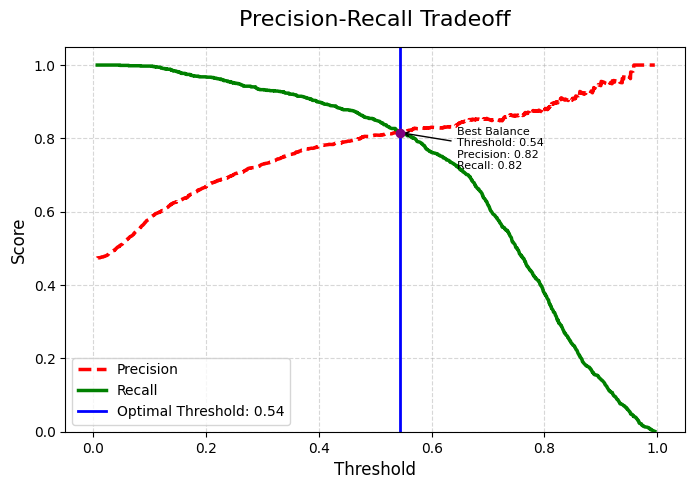

In [253]:
plot_precision_recall_tradeoff(precision, recall, thresholds)

# Deciphering the Confusion Matrix  

## Beyond Accuracy: Seeing the Full Picture  
Accuracy alone doesn’t reveal where a model goes wrong. The confusion matrix shows not just overall performance but the exact nature of successes and mistakes.  

---

### 🟩 True Negatives (Top-Left)  
Correctly identified **non-subscribers** → prevents wasted effort on uninterested clients.  

### 🟥 False Positives (Top-Right)  
Predicted as subscribers but **actually not interested** → wasted calls, emails, and resources.  

### 🟥 False Negatives (Bottom-Left)  
Real subscribers the model **failed to detect** → costly missed opportunities.  

### 🟩 True Positives (Bottom-Right)  
Correctly predicted **subscribers** → the key wins that boost campaign success.  

---

## Why It Matters  
The matrix reveals:  
- **Precision** → how accurate the “Yes” predictions are  
- **Recall** → how many true subscribers we capture  
- **Tradeoffs** → whether minimizing false positives or false negatives matters more  

👉 An ideal matrix isn’t always perfectly diagonal — the “best” depends on whether the business values avoiding wasted outreach or maximizing captured opportunities.  


In [356]:
xgb_predictions = xgb_model.predict(x_test_prepared)

In [357]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test_input, predictions):
    conf_matrix = confusion_matrix(y_test_input, predictions)
    f, ax = plt.subplots(figsize=(8,5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax, cmap="Blues")
    plt.title("XGBoost Confusion Matrix", fontsize=20)
    plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
    ax.set_xticklabels(['Predicted No', 'Predicted Yes'], fontsize=16, rotation=0)
    ax.set_yticklabels(['Actual No', 'Actual Yes'], fontsize=16, rotation=0)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()



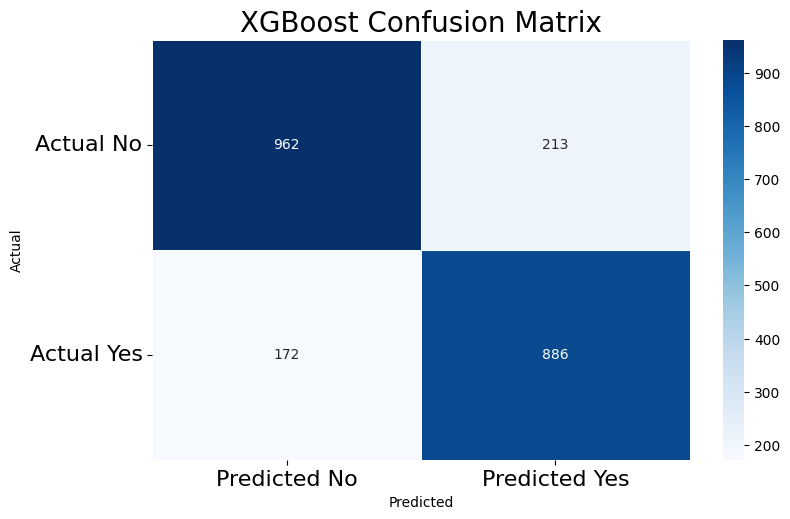

In [358]:
plot_confusion_matrix(y_test_prepared, xgb_predictions)

### ROC Curve (Receiver Operating Characteristic)

The ROC curve evaluates how well a classifier distinguishes between clients who subscribe to a term deposit (positive class) and those who do not (negative class).  
- **X-axis:** False Positive Rate (1 - Specificity)  
- **Y-axis:** True Positive Rate (Sensitivity/Recall)  

As the threshold shifts, the ROC curve plots different trade-offs between correctly identifying positives and incorrectly classifying negatives. A model that performs well will have a curve that rises quickly toward the **top-left corner**, indicating strong separation between the two classes. A random model, by contrast, would lie close to the diagonal line from bottom-left to top-right.



In [275]:
from sklearn.metrics import roc_curve, roc_auc_score

In [286]:
def calculate_auc_scores(classifiers_dict, X_test, y_test):
    """
    Calculates ROC AUC scores for multiple classifiers and returns them in a pandas DataFrame.

    Args:
        classifiers_dict (dict): A dictionary where keys are classifier names
                                 and values are the trained classifier objects.
        X_test (pd.DataFrame): The feature set for testing.
        y_test (pd.Series): The true labels for the test set.

    Returns:
        pd.DataFrame: A DataFrame containing the classifier names and their
                      respective ROC AUC scores, sorted in descending order.
    """
    auc_scores = {}
    
    # Iterate through the provided classifiers
    for name, classifier in classifiers_dict.items():
        # Get predicted probabilities for the positive class
        y_pred_proba = classifier.predict_proba(X_test)[:, 1]
        
        # Calculate the AUC score
        auc = roc_auc_score(y_test, y_pred_proba)
        
        # Store the result
        auc_scores[name] = auc
    
    # Create and sort the DataFrame
    auc_df = pd.DataFrame({
        "Classifier": list(auc_scores.keys()),
        "ROC_AUC": list(auc_scores.values())
    }).sort_values(by="ROC_AUC", ascending=False).reset_index(drop=True)
    
    return auc_df

In [ ]:
auc_df = calculate_auc_scores(best_models, x_test_prepared, y_test_prepared)
auc_df  

,Classifier,ROC_AUC
0,XGBoost,0.904059
1,Gradient Boosting,0.903275
2,Random Forest,0.894400
3,Logistic Regression,0.886184
4,Linear SVM,0.885593
5,Neural Net,0.870406
6,Decision Tree,0.864430
7,Nearest Neighbors,0.853965
8,Naive Bayes,0.783876


In [312]:
def plot_multiple_roc_curves(classifiers_dict, X_test, y_test):
    """
    Plots the ROC curves for multiple classifiers on a single graph.

    Args:
        classifiers_dict (dict): A dictionary where keys are classifier names
                                 and values are the trained classifier objects.
        X_test (pd.DataFrame): The feature set for testing.
        y_test (pd.Series): The true labels for the test set.
    """
    plt.figure(figsize=(8, 5))
    plt.title('ROC Curves for Multiple Classifiers', fontsize=18)
    
    # Plot the random classifier baseline
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
    
    # Iterate through the provided classifiers
    for name, classifier in classifiers_dict.items():
        # Get predicted probabilities for the positive class
        y_pred_proba = classifier.predict_proba(X_test)[:, 1]
        
        # Calculate FPR, TPR, and AUC
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        auc_score = roc_auc_score(y_test, y_pred_proba)
        
        # Plot the ROC curve for the current classifier
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.4f})')
        
    plt.xlabel('False Positive Rate (FPR)', fontsize=14)
    plt.ylabel('True Positive Rate (TPR)', fontsize=14)
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(True)
    plt.show()

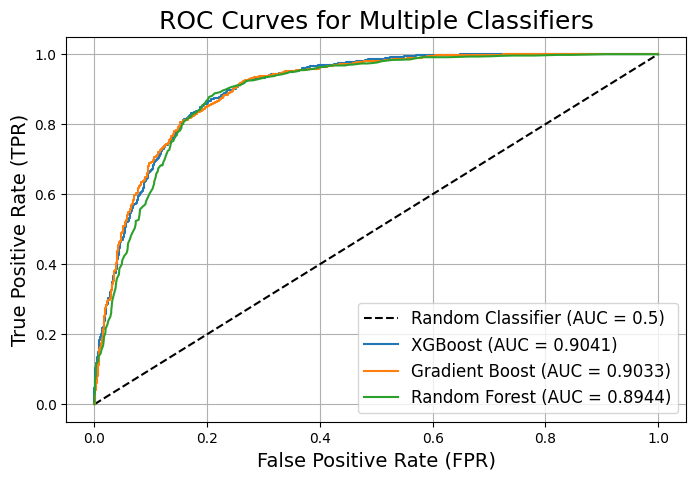

In [313]:
top_3_models = {'XGBoost': best_models['XGBoost'], 'Gradient Boost': best_models['Gradient Boosting'], 'Random Forest': best_models['Random Forest']}

plot_multiple_roc_curves(top_3_models, x_test_prepared, y_test_prepared)

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(
    estimators=[  
        ("XGBoost", xgb_model),
        ("Gradient Boost", grad_model),  
        ("Random Forest", rfc_model)  
    ],
    voting='soft'
)

voting_classifier.fit(x_train_prepared, y_train_prepared)  

c:\Users\Shervin Zare\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning:

[15:24:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




VotingClassifier(estimators=[('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interactio...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('Gradient Boost',
                              GradientBoostingClassifier(n_estimators=200)),
                             ('Random Forest',
                              RandomForestClassifier(n_estimators=200))],
                 voting='soft')

In [343]:
def evaluate_models_accuracy(*models, X_train, y_train, X_test, y_test):
    """
    Evaluate multiple models and return accuracy scores in a DataFrame.
    
    Parameters:
    *models: Variable number of model objects
    X_train: Training features
    y_train: Training labels
    X_test: Test features
    y_test: Test labels
    
    Returns:
    pd.DataFrame: DataFrame with accuracy scores for each model
    """
    
    results = []
    
    for clf in models:
        clf.fit(X_train, y_train)
        predict = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predict)
        
        results.append({
            'Classifier': clf.__class__.__name__,
            'Accuracy': accuracy
        })
    
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('Accuracy', ascending=False)
    
    return results_df

In [354]:
prediction_results = evaluate_models_accuracy(
    xgb_model, grad_model, rfc_model, voting_classifier,
    X_train=x_train_prepared, 
    y_train=y_train_prepared,  
    X_test=x_test_prepared, 
    y_test=y_test_prepared    
)

prediction_results = prediction_results.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
prediction_results = prediction_results[prediction_results['Classifier'] != 'VotingClassifier']
prediction_results

c:\Users\Shervin Zare\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning:

[16:06:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\Shervin Zare\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning:

[16:06:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




,Classifier,Accuracy
1,XGBClassifier,0.827586
2,RandomForestClassifier,0.826243
3,GradientBoostingClassifier,0.824451


# 🏆 XGBoost Classifier Wins!

## Best Model for Term Deposit Subscription Prediction

After comprehensive evaluation of multiple machine learning models, the **XGBoost Classifier** has been identified as the optimal solution for predicting whether potential clients will subscribe to a term deposit.

### 🎯 Key Performance Metrics
- **Accuracy: 82.76%** - Outstanding predictive performance  
- **ROC AUC: 90.41%** - Excellent ranking capability
- **Recall: 83.74%** - Strong Recall Score

### 💡 Why XGBoost?
- Demonstrates superior predictive capabilities across multiple metrics
- Achieves the best overall performance in ROC AUC and F1 Score
- Provides well-calibrated probability estimates for confident decision-making
- Offers robust performance with excellent generalization capabilities

### 🚀 Business Impact
This model enables the bank to:
- Identify high-probability clients for targeted marketing campaigns
- Optimize sales team efforts and improve conversion rates  
- Reduce marketing costs by focusing on qualified leads
- Enhance customer experience through personalized offers

The XGBoost Classifier has proven to be the most effective tool for maximizing subscription rates and driving business growth.

### 📈 Data-Driven Recommendations for the Next Campaign

Based solely on our analysis and model, we can confidently recommend the following strategies:

**1. Leverage the Predictive Model for Targeting:**
   Our **XGBoost model (82.8% accuracy)** is the most powerful tool we developed. The bank should use it to score clients before the campaign and focus outreach efforts **only on high-probability leads**, dramatically increasing efficiency and conversion rates.

**2. Prioritize Engagement Over Volume:**
   **Call duration is the strongest predictor** of subscription. Clients who engaged in longer calls (>485 seconds) had a **78% subscription rate**. The strategy should shift from making as many calls as possible to fostering longer, more meaningful conversations.

**3. Implement a Call Duration Threshold:**
   Develop call scripts and questionnaires designed to increase client engagement time. Since duration is a real-time indicator, agents should be trained to recognize promising conversations and prioritize quality over quantity.

**4. Focus on the Right Demographic Mix:**
   While more analysis is always beneficial, our initial clustering showed that **marital status combined with education level** (e.g., 'married/tertiary') provides a strong signal for median account balance, which can be a useful proxy for identifying potentially interested clients.

By using the model to target smarter and focusing agent effort on driving engagement, the bank can expect a significant increase in campaign success rate.